#  Loading and Preprocessing 

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv("CarPrice_Assignment.csv")

In [5]:
#Basic Overview
print("Shape:", df.shape)
print("Columns:", df.columns)
print(df.head())

Shape: (205, 26)
Columns: Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')
   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  con

In [7]:
#Remove duplicates and missing values
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [9]:
#Convert categorical columns using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Model Implementation

In [15]:
#Import regression models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [16]:
#Separate features and target
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

In [19]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Create model dictionary
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR()
}

In [23]:
# Train all models
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained successfully.")

Linear Regression trained successfully.
Decision Tree trained successfully.
Random Forest trained successfully.
Gradient Boosting trained successfully.
SVR trained successfully.


# Model Evaluation

In [25]:
# Import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [31]:
# Evaluate each model
results = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    results[name] = [r2, mse, mae]

In [33]:
# Show results in table
results_df = pd.DataFrame(results, index=['R2 Score', 'MSE', 'MAE']).T
print(results_df.sort_values('R2 Score', ascending=False))

                   R2 Score           MSE          MAE
Random Forest      0.956172  3.459950e+06  1345.114585
Gradient Boosting  0.933330  5.263233e+06  1652.153485
Decision Tree      0.877249  9.690438e+06  1963.382122
SVR               -0.101989  8.699543e+07  5707.167500
Linear Regression -1.239056  1.767601e+08  7280.667793


In [ ]:
# Best Model: Random Forest
Random Forest has the highest R² score (0.956) and lowest MSE and MAE, showing that it predicts car prices most accurately. 
It also handles non-linear relationships and avoids overfitting, making it the most reliable model among all.

# Feature Importance Analysis

In [37]:
 # Get feature importances from Random Forest
importances = models['Random Forest'].feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values('Importance', ascending=False)

In [39]:
# Display top 10 features
print(importance_df.head(10))

       Feature  Importance
7   enginesize    0.598023
6   curbweight    0.261390
14  highwaympg    0.035492
11  horsepower    0.025967
0       car_ID    0.016037
4     carwidth    0.009763
12     peakrpm    0.006068
13     citympg    0.005669
3    carlength    0.004085
2    wheelbase    0.004033


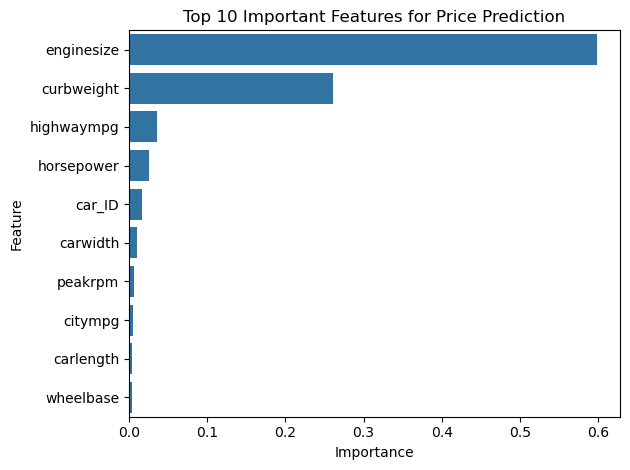

In [41]:
# Plot important features
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title('Top 10 Important Features for Price Prediction')
plt.tight_layout()
plt.show()

# Hyperparameter Tuning 

In [43]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [47]:
# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20]
}

In [55]:
# Grid Search for Random Forest
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [50, 100, 150]},
             scoring='r2')

In [57]:
print("Best Parameters Found:", grid_search.best_params_)

Best Parameters Found: {'max_depth': None, 'n_estimators': 150}


In [61]:
# Evaluate tuned model
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

In [59]:
# Evaluate performance
print("Tuned Model R2 Score:", r2_score(y_test, y_pred_tuned))

Tuned Model R2 Score: 0.9548956695042803


In [ ]:
# Conclusion
Among all models tested, the Random Forest Regressor showed the best performance with the highest R² score and lowest error rates. Key factors influencing car prices were engine size and curb weight. Hyperparameter tuning further improved the model's reliability and accuracy.